In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

stopwords = set(STOPWORDS)

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake["fake"] = 1
df_true["fake"] = 0

In [6]:
df_true.head(5)

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [7]:
print("The number of rows for fake dataset is: ", df_fake.shape[0], "\nThe number of columns for fake dataset is: ", df_fake.shape[1] , "\n")
print("The number of rows for true dataset is: ", df_true.shape[0], "\nThe number of columns for fake dataset is: ", df_true.shape[1])

The number of rows for fake dataset is:  23481 
The number of columns for fake dataset is:  5 

The number of rows for true dataset is:  21417 
The number of columns for fake dataset is:  5


In [8]:
df_fake.describe(include = 'all')

,title,text,subject,date,fake
count,23481,23481,23481,23481,23481.0
unique,17903,17455,6,1681,NaN
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",NaN
freq,6,626,9050,46,NaN
mean,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,1.0


In [9]:
df_true.describe(include = 'all')

,title,text,subject,date,fake
count,21417,21417,21417,21417,21417.0
unique,20826,21192,2,716,NaN
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",NaN
freq,14,8,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0


### We notice in the two above tables that duplicates exist. 

In [10]:
print("Fake News Null Values: \n", df_fake.isnull().sum(), "\n")
print("True News Null Values: \n", df_true.isnull().sum())

Fake News Null Values: 
 title      0
text       0
subject    0
date       0
fake       0
dtype: int64 

True News Null Values: 
 title      0
text       0
subject    0
date       0
fake       0
dtype: int64


In [20]:
df_fake_unique = df_fake.drop_duplicates('title') #Unique values generated from dropping title in fake set

In [12]:
df_true_unique = df_true.drop_duplicates('title') #Unique values generated from dropping title in true set

In [14]:
print("The number of rows for fake dataset is: ", df_fake_unique.shape[0], "\nThe number of columns for fake dataset is: ", df_fake.shape[1] , "\n")
print("The number of rows for true dataset is: ", df_true_unique.shape[0], "\nThe number of columns for fake dataset is: ", df_true.shape[1])

The number of rows for fake dataset is:  17903 
The number of columns for fake dataset is:  5 

The number of rows for true dataset is:  20826 
The number of columns for fake dataset is:  5


In [15]:
df_fake_unique.describe(include='all')

,title,text,subject,date,fake
count,17903,17903,17903,17903,17903.0
unique,17903,17450,5,1681,NaN
top,Donald Trump Sends Out Embarrassing New Year’...,,News,"May 26, 2016",NaN
freq,1,444,9049,35,NaN
mean,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,1.0


In [17]:
df_true_unique.describe(include='all')

,title,text,subject,date,fake
count,20826,20826,20826,20826,20826.0
unique,20826,20821,2,716,NaN
top,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 6, 2017",NaN
freq,1,2,11150,165,NaN
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0


Duplicates in text exist too. Repeat previous step. 
###Notice how true dataset has fewer duplicates.

In [24]:
df_fake_unique = df_fake.drop_duplicates('text') #Unique values generated from dropping text in fake set

In [25]:
df_true_unique = df_true.drop_duplicates('text') #Unique values generated from dropping text in fake set

In [26]:
df_fake_unique.describe(include='all')

,title,text,subject,date,fake
count,17455,17455,17455,17455,17455.0
unique,17450,17455,5,1681,NaN
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Donald Trump just couldn t wish all Americans ...,News,"May 26, 2016",NaN
freq,3,1,9050,35,NaN
mean,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,1.0


In [27]:
df_true_unique.describe(include='all')

,title,text,subject,date,fake
count,21192,21192,21192,21192,21192.0
unique,20821,21192,2,716,NaN
top,Factbox: Trump fills top jobs for his administ...,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 6, 2017",NaN
freq,14,1,11214,166,NaN
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0


##Least amount of duplication now occured by dropping dup text.

In [28]:
df_left_news = df_fake[df_fake['subject'].str.contains('left-news')]
print(df_left_news.head(10))
df_left_news.count()

                                                   title  \
17461  BARBRA STREISAND Gives Up On Dream Of Impeachi...   
17462  WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...   
17463  “CONSERVATIVE GAY GUY” BLASTS Pence’s Aspen Ne...   
17464  WHITE COLLEGE SNOWFLAKES Can ‘Identify’ As Bla...   
17465  BILL NYE The FAKE Science Guy THREATENS Conser...   
17466  EMBARRASSING: Anti-Trump “THE HILL” Gets SLAMM...   
17467  TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...   
17468  IT ONLY TOOK ONE TWEET FROM PRESIDENT TRUMP Fo...   
17469  WATCH HERO Singlehandedly Shut Down Anti-Trump...   
17470  FINALLY RELEASED! Email from Huma Abedin Inclu...   

                                                    text    subject  \
17461  Barbra Streisand was an Obama sycophant and on...  left-news   
17462  Everyone suspected the sketchy Steele Dossier ...  left-news   
17463  It s been said that good fences make good neig...  left-news   
17464  The latest video from Campus Reform shows just..

title      4459
text       4459
subject    4459
date       4459
fake       4459
dtype: int64

In [32]:
df_left_news = df_fake_unique[df_fake_unique['subject'].str.contains('left-news')]

In [33]:
df_news = pd.concat([df_fake_unique, df_true_unique])

In [34]:
df_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [35]:
df_news.tail()

,title,text,subject,date,fake
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


[Text(0.5, 1.0, 'True vs Fake News Count')]

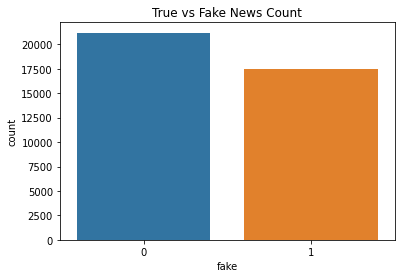

In [36]:
sns.countplot(x='fake', data=df_news).set(title='True vs Fake News Count')

[Text(0.5, 1.0, 'Distribution of Subject in True and Fake News')]

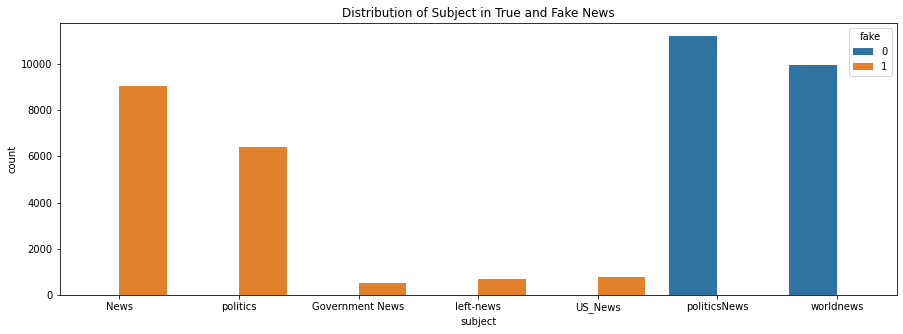

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x='subject', data=df_news, hue='fake').set(title='Distribution of Subject in True and Fake News')

In [38]:
#Change date to columns to be able to see trendline and time patterns.
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.
df_news['year'] = df_news['date'].dt.year
df_news['month'] = df_news['date'].dt.month

df_news.head()

,title,text,subject,date,fake,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


[Text(0.5, 1.0, 'Distribution of True vs Fake News by Years')]

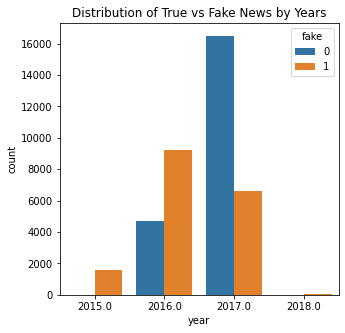

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='year', data=df_news, hue='fake').set(title='Distribution of True vs Fake News by Years')

[Text(0.5, 1.0, 'Distribution of True vs Fake News by Months')]

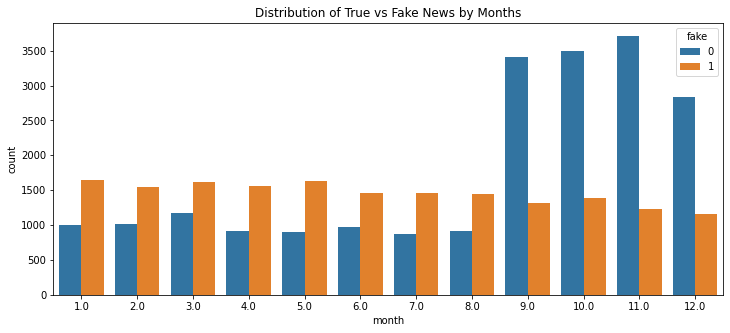

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='month', data=df_news, hue='fake').set(title='Distribution of True vs Fake News by Months')

In [41]:
#Average Word Count of Fake & True News in Title
def count_words(text):
    return len(text.split())

def count_unique_words(text):
    return len(set(text.split()))

def df_title_counter(df):
  title_sum_word = 0;
  title_sum_uniq = 0
  for i in range(df.shape[0]):
    title_sum_word += count_words(df.title[i])
    title_sum_uniq += count_unique_words(df.title[i])

  average_word_title = title_sum_word/df.shape[0]
  average_uniq_title = title_sum_uniq/df.shape[0]

  arr = [average_word_title, average_uniq_title]
  return arr


def df_text_counter(df):
  text_sum_word = 0;
  text_sum_uniq = 0
  for i in range(df.shape[0]):
    text_sum_word += count_words(df.text[i])
    text_sum_uniq += count_unique_words(df.text[i])

  average_word_text = text_sum_word/df.shape[0]
  average_uniq_text = text_sum_uniq/df.shape[0]

  arr = [average_word_text, average_uniq_text]
  return arr


fake_title_avg = df_title_counter(df_fake)
fake_text_avg = df_text_counter(df_fake)

true_title_avg = df_title_counter(df_true)
true_text_avg = df_text_counter(df_true)

print(fake_title_avg)
print(fake_text_avg)

print(true_title_avg)
print(true_text_avg)

df_avg = pd.DataFrame({'Type':["Fake","True"], 'Title Word Average':[fake_title_avg[0],true_title_avg[0]], 'Title Unique Average':[fake_title_avg[1],true_title_avg[1]], 'Text Average':[fake_text_avg[0],true_text_avg[0]], 'Text Unique Average':[fake_text_avg[1],true_text_avg[1]]})

df_avg

[14.732805246795282, 14.490609428899962]
[423.1979046888974, 240.90123929985947]
[9.954475416725032, 9.876826819816033]
[385.6400989867862, 226.9327636923939]


,Type,Title Word Average,Title Unique Average,Text Average,Text Unique Average
0,Fake,14.732805,14.490609,423.197905,240.901239
1,True,9.954475,9.876827,385.640099,226.932764


In [43]:
df_news['text'][0]

0    Donald Trump just couldn t wish all Americans ...
0    WASHINGTON (Reuters) - The head of a conservat...
Name: text, dtype: object

##Notice the 'couldn t' term which indicates preprocessing occured.

##Though by going to the dataset entry 0, there are twitter mentions and usernames. Why are there so many?

In [46]:
def twitter_use_count(df):
    twitter_username = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    listt = []
    for text in df['text']:
        count += len(re.findall(twitter_username, text))
    return count

In [54]:
import plotly.express as px
import plotly.graph_objects as go

fake_twitter_count = twitter_use_count(df_fake_unique)
true_twitter_count = twitter_use_count(df_true_unique)
fig = go.Figure()
fig = px.bar(y=[fake_twitter_count, true_twitter_count], x=['Fake', 'True'], title='Twitter Username Pattern')
fig.show()

#Lets preprocess!

First we add both title to text and remove title and keep only the text feature and label.

In [55]:
#Add title to text
df_news['text'] = df_news['title'] + df_news['text']
df_news.drop(labels=['title'], axis=1, inplace=True)

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
import nltk
from nltk import pos_tag, pos_tag_sents, word_tokenize

#Lowercase, remove punctuation, and remove stopwords
def clean_text(text):
    stop_words = set(STOPWORDS)
    text = text.lower()
    text = re.sub(r'\'s','',text) #This is needed to prevent turning nouns into verb when lemmatizing and POS tagging
    text = re.sub(r's\'','',text)
    text = re.sub(r'\'m',' am',text) #Converts I'm to I am
    text = re.sub(r'n\'t',' not',text) #This is needed to convert the n't to not. 
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r' t | s | m ','',text) #Removes already existant wrong preprocessing leftover
    
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
    return filtered_sentence

In [64]:
df_fake_unique['text'] = df_fake_unique['title'] + df_fake_unique['text']
df_fake_unique.drop(labels=['title'], axis=1, inplace=True)

<ipython-input-64-cf8646456e1e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df_true_unique['text'] = df_true_unique['title'] + df_true_unique['text']
df_true_unique.drop(labels=['title'], axis=1, inplace=True)

<ipython-input-65-05d9b8878701>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### After combining title and text, text feature is now ready to be preprocessed!

In [67]:
df_fake_unique['text'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is DisturbingDonald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this d

In [68]:
df_fake_unique['text_clean'] = df_fake_unique['text'].apply(lambda x: clean_text(x))

<ipython-input-68-0ce0717aafe1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_fake_unique['text_clean'][0]

['donald',
 'trump',
 'sends',
 'embarrassing',
 'new',
 'years',
 'eve',
 'message',
 'disturbingdonald',
 'trump',
 'couldnwish',
 'americans',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'couldndo',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 '2018',
 'will',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 '2018',
 'will',
 'great',
 'year',
 'america',
 'donald',
 'j',
 'trump',
 'realdonaldtrump',
 'december',
 '31',
 '2017

In [72]:
df_fake_unique['text_joined'] = df_fake_unique['text_clean'].apply(lambda x: ' '.join(x))

<ipython-input-72-a687e3debaee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A sample of fake text entry shows misspellings, errors in splitting etc. 

In [70]:
df_true_unique['text_clean'] = df_true_unique['text'].apply(lambda x: clean_text(x))

<ipython-input-70-d2c921b469dc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df_true_unique['text_clean'][0]

['us',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'scriptwashington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 '2018',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'will',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans'

Notice how the tokenized words are much better! Numbers are not colliding and are all splitted correctly! Also low (if existant) misspelled words!

In [71]:
df_true_unique['text_joined'] = df_true_unique['text_clean'].apply(lambda x: ' '.join(x))

<ipython-input-71-bcd9a9a59cff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Now we have tokenized and got the essential words. Lets explore them more!

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

list_fake = get_top_n_words(df_fake_unique['text_joined'], 25)
list_true = get_top_n_words(df_true_unique['text_joined'], 25)

In [77]:
new_list_words = [ seq[0] for seq in list_fake ]
new_list_values = [ seq[1] for seq in list_fake ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values, 
                         x=new_list_words, 
                        marker_color='lightsalmon'
))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Fake News Frequency Words'
})
fig.show()

In [78]:
new_list_words = [ seq[0] for seq in list_true ]
new_list_values = [ seq[1] for seq in list_true ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values, 
                         x=new_list_words, 
                        marker_color='lightsalmon'
))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Real News Frequency Words'
})
fig.show()

In [79]:
df_true_unique_text = df_true_unique['text'].apply(lambda x: ' '.join(x))

In [80]:
df_fake_unique_text = df_fake_unique['text'].apply(lambda x: ' '.join(x))

In [81]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=1600, height=800, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

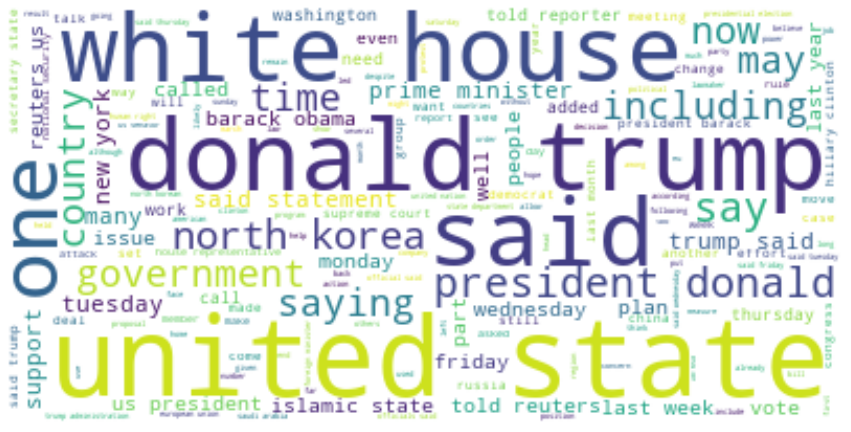

In [85]:
text = " ".join(i for i in df_true_unique.text_joined)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

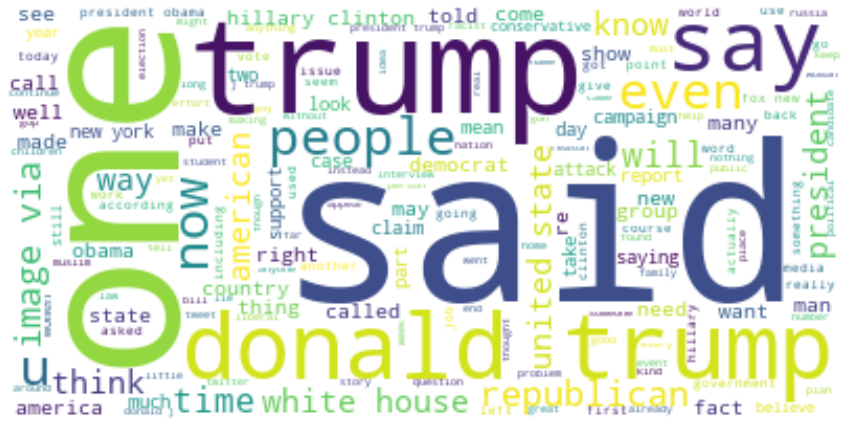

In [86]:
text = " ".join(i for i in df_fake_unique.text_joined)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()